## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
data = pd.read_csv('ab_data.csv')
data.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
data.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
unique_users = data.user_id.nunique()

d. The proportion of users converted.

In [5]:
# Proportion = df.query('converted == 1')['user_id'].nunique()/uniqusers
Proportionality = data['converted'].mean()
print(Proportionality)

0.11965919355605512


In [6]:
data.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
dfnew = data.query('(group == "control" and  landing_page == "new_page") or (group == "treatment" and landing_page == "old_page")')

In [8]:
len(data)

294478

In [9]:
dfnew['user_id'].nunique()

3893

f. Do any of the rows have missing values?

In [10]:
dfnew.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
controldata = data.query('group == "treatment" and landing_page == "new_page"')
treatmentdata = data.query('group == "control" and landing_page == "old_page"')
df2 = controldata.merge(treatmentdata,how='outer')

In [12]:
df2.shape

(290585, 5)

In [13]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [14]:
df2.user_id.nunique()

290584

In [15]:
df2.duplicated(['user_id'])

0         False
1         False
2         False
3         False
4         False
          ...  
290580    False
290581    False
290582    False
290583    False
290584    False
Length: 290585, dtype: bool

b. There is one **user_id** repeated in **df2**.  What is it?

In [16]:
df2['is_duplicated'] = df2.duplicated(['user_id'])

In [17]:
df2['is_duplicated'].value_counts()

False    290584
True          1
Name: is_duplicated, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [18]:
duplicate =df2[df2['is_duplicated']==True]
duplicate_userid = duplicate['user_id']
duplicate_userid

1404    773192
Name: user_id, dtype: int64

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [19]:
# Deleting 1404 Row
df2 = df2.drop(1404,axis=0)

In [20]:
df2.duplicated(['user_id']).sum()

0

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [21]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [22]:
control_converted = data.query('group == "control"').converted.mean()
control_converted

0.12039917935897611

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [23]:
treatment_converted = data.query('group == "treatment"').converted.mean()
treatment_converted

0.11891957956489856

d. What is the probability that an individual received the new page?

In [24]:
(df2['landing_page'] == 'new_page').mean()

0.5000619442226688

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

* The probability of an individual converting regardless of the page they receive  11.9597% 


* Treatment group, the probability they converted is 11.891% 


* Control group, the probability they converted is 12.039%. 


* The probablity users converted in both control and treatment group are almost similar to each other

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

Null Hypothesis:
$$H_0: p_{old} - p_{new} >=  0$$


Alternate Hyppthesis:
$$H_1: p_{old} - p_{new} < 0$$




`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [25]:
pnew = df2['converted'].mean() 

In [26]:
pnew

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [27]:
pold = df2['converted'].mean()

In [28]:
pold

0.11959708724499628

c. What is $n_{new}$?

In [29]:
nnew = df2.query('landing_page == "new_page"')['user_id'].nunique()

d. What is $n_{old}$?

In [30]:
nold = df2.query('landing_page == "old_page"')['user_id'].nunique()

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [31]:
converted_newpage = np.random.choice([0,1],nnew, p=(pnew,1-pnew))
np.unique(converted_newpage)

array([0, 1])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [32]:
converted_oldpage = np.random.choice([0,1],nnew, p=(pold,1-pold))
np.unique(converted_oldpage)

array([0, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [33]:
obs_diff = converted_newpage.mean()-converted_oldpage.mean()

In [34]:
obs_diff

0.0002615098754387146

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [35]:
p_diffs = []
size = data.shape[0] 
for _ in range(10000):
    sample = df2.sample(size, replace = True)

    converted_newpage = np.random.choice([0,1],nnew, p=(pnew,1-pnew))

    converted_oldpage = np.random.choice([0,1],nnew, p=(pold,1-pold))

    p_diffs.append(converted_newpage.mean() - converted_oldpage.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

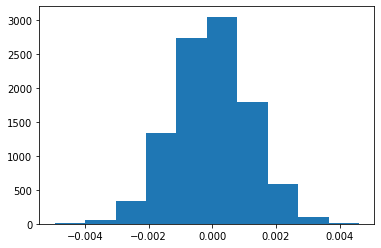

In [36]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [37]:
# Create number of users with all new_page users and all old_page users with a converted status

conv_new = df2.query('converted == 1 and landing_page == "new_page"')['user_id'].nunique()

conv_old = df2.query('converted == 1 and landing_page == "old_page"')['user_id'].nunique()

In [38]:
conv_new

17264

In [39]:
conv_old

17489

In [40]:
act_diff = df2[df2['group'] == 'treatment']['converted'].mean() -  df2[df2['group'] == 'control']['converted'].mean()
print(act_diff)

-0.0015782389853555567


In [70]:
p_diffs = np.array(p_diffs)
p_diffs

array([-7.22593077e-04,  1.85121464e-03,  5.36783429e-04, ...,
       -6.19365494e-05,  1.03227582e-03, -2.06455165e-04])

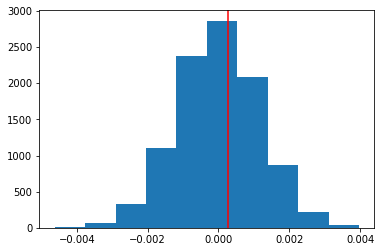

In [71]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0, np.std(p_diffs), np.array(p_diffs).size)
#Plot Null distribution
plt.hist(null_vals)
#Plot vertical line for observed statistic
plt.axvline(x=obs_diff,color ='red');

In [75]:
# (null_vals > obs_diff).mean()

In [76]:
(act_diff < p_diffs).mean()

0.9109

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

   
   Rejecting null value should be equal to or less than the alpha (0.05); therefore, it is scientifically significant. In this case, the p-value is equal 0.91 chance of being p_diffs. If the p-value is greater than alpha (0.05), it does not reject the null. It means that it is not scientifically significant.


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [43]:
import statsmodels.api as sm

# Create number of users with all new_page users and all old_page users with a converted status

convert_new = df2.query('converted == 1 and landing_page == "new_page"')['user_id'].nunique()

convert_old = df2.query('converted == 1 and landing_page == "old_page"')['user_id'].nunique()
n_old = df2.query('landing_page == "old_page"')['user_id'].nunique()
n_new = df2.query('landing_page == "new_page"')['user_id'].nunique()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [44]:
z_score, p_value = sm.stats.proportions_ztest(np.array([convert_new,convert_old]),np.array([n_new,n_old]), alternative = 'larger')

In [45]:
z_score, p_value

(-1.3109241984234394, 0.9050583127590245)

In [46]:
p_value

0.9050583127590245

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The p-value associated with a 95% confidence level is 0.05. 
Z score is between -1.96 and +1.96, your p-value will be larger than 0.05,



In this case our z-score is equal to 1.3109, which falls within -1.96 and 1.96. Therefore, we fail to reject the null.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression** - As the target variable is categorical (whether it is converted or not)

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [47]:
pd.get_dummies(df2['group'])

,control,treatment
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
290580,1,0
290581,1,0
290582,1,0
290583,1,0


In [48]:
df2[['control', 'ab_page']] = pd.get_dummies(df2['group'])
df2.drop(['control'], axis=1, inplace=True)

In [49]:
df2['intercept'] = 1
df2.head()

,user_id,timestamp,group,landing_page,converted,is_duplicated,ab_page,intercept
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,False,1,1
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,False,1,1
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,False,1,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,False,1,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,False,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [50]:
#Create Logit regression model for conveted variable and  ab_page, and us control as baseline

import statsmodels.api as sm

model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [51]:
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 03 Aug 2020   Pseudo R-squ.:               8.077e-06
Time:                        21:30:21   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

* The p-value associated with ab_page is 0.19.

* The null hypothesis associated here - is  that there is no difference between the treatment and control group.

* Alternative hypotheses is that there is difference  between the treatment and control group

* **Part II** assumes that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, so when compared from both the above sceanrios,they have different explainory varibale or factor for the result. 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

* Other factors like the correlation between participants' behaviors towards the web page colors. We could check their genders and main reasons why they need to use our website, We can observe if there is any difference in browsing time of each user, so that the conversion rate will vary as per the time both in week end and week days.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [52]:
countries = pd.read_csv('countries.csv')
countries

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK
...,...,...
290579,653118,US
290580,878226,UK
290581,799368,UK
290582,655535,CA


In [53]:
np.unique(countries['country'])

array(['CA', 'UK', 'US'], dtype=object)

In [54]:
#Join ab dataset with country dataset
df_c = countries.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_c.head()

,country,timestamp,group,landing_page,converted,is_duplicated,ab_page,intercept
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,False,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,False,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,False,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,False,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,False,1,1


In [55]:
df_c['intercept'] = 1
df_c[['CA','UK','US']] = pd.get_dummies(df_c['country'])


df_c[['CA','US']] = pd.get_dummies(df_c['country'])[['CA','US']]

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [56]:
df_c

,country,timestamp,group,landing_page,converted,is_duplicated,ab_page,intercept,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,False,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,False,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,False,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,False,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,False,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
653118,US,2017-01-09 03:12:31.034796,control,old_page,0,False,0,1,0,0,1
878226,UK,2017-01-05 15:02:50.334962,control,old_page,0,False,0,1,0,1,0
799368,UK,2017-01-09 18:07:34.253935,control,old_page,0,False,0,1,0,1,0


In [59]:
#Create Logit regression model for converted and country, and us CA and old page as baseline
model = sm.Logit(df_c['converted'], df_c[['intercept','ab_page','CA','US']])
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 03 Aug 2020   Pseudo R-squ.:               2.323e-05
Time:                        21:31:22   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9794      0.013   -155.415      0.000      -2.004      -1.954
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0506      0.028     -1.784      0.074      -0.106       0.005
US            -0.0099      0.013     -0.743      0.457      -0.036       0.016
==============================================================================
"""

In [60]:
np.exp(result.params)

intercept    0.138154
ab_page      0.985168
CA           0.950621
US           0.990165
dtype: float64

In [61]:
1/np.exp(-0.0506), np.exp(-0.0099)


(1.0519020483004984, 0.9901488436829572)

Above results can be read as:
* users from CA are 1.05 times more likely to convert as compared to users from UK
* users from US are 0.99 times more likely to less convert as compared to users from UK

In [62]:
df_c['new_CA'] = df_c['CA']*df_c['ab_page']
df_c['new_US'] = df_c['US']*df_c['ab_page']
df_c['new_UK'] = df_c['UK']*df_c['ab_page']
df_c.head()

,country,timestamp,group,landing_page,converted,is_duplicated,ab_page,intercept,CA,UK,US,new_CA,new_US,new_UK
user_id,,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,False,0,1,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,False,1,1,0,0,1,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,False,1,1,0,1,0,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,False,0,1,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,False,1,1,0,1,0,0,0,1


* All of the p-values are not important or insignificant for each of the variables,But intercept is significant


In [63]:
model1 = sm.OLS(df_c['converted'], df_c[['intercept', 'ab_page', 'UK', 'US', 'new_UK', 'new_US']])
results = model1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.466
Date:                Mon, 03 Aug 2020   Prob (F-statistic):              0.197
Time:                        21:31:33   Log-Likelihood:                -85265.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290578   BIC:                         1.706e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1188      0.004     31.057      0.000       0.111       0.126
ab_page       -0.0069      0.005     -1.277      0.202      -0.017       0.004
UK             0.0012      0.004      0.296      0.767      -0.007       0.009
US             0.0018      0.004      0.467      0.641      -0.006       0.010
new_UK         0.0080      0.006      1.360      0.174      -0.004       0.020
new_US         0.0047      0.006      0.845      0.398      -0.006       0.016
==============================================================================
Omnibus:                   125549.436   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414285.945
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         26.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Conclusion:
* The performance of the old page was found better as computed by above three techniques.
* Hence, we accept the Null Hypothesis and Reject the Alternate Hypothesis.